In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import datetime
import matplotlib.dates as mdates
import seaborn as sns; sns.set()
sns.set_context("poster",font_scale=1.2,rc={"font":"helvetica"});
sns.set_style("white"); #sns.set_style("ticks")
cp = sns.color_palette("colorblind") #sns.palplot(current_palette)
%matplotlib inline
%config InlineBackend.figure_format = "retina"
import matplotlib.pyplot as plt
import sys
sys.path.append("../src/")
from matplotlib import rcParams

rcParams["savefig.dpi"] = 100
#rcParams["text.usetex"] = True #uncomment to use tex. Slow, but pretty
#rcParams["font.weight"] = 900

rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['font.weight'] = "normal"
rcParams["axes.formatter.useoffset"] = False
rcParams['xtick.major.width']=1
rcParams['xtick.major.size']=7
rcParams['xtick.minor.width']=1
rcParams['xtick.minor.size']=4
rcParams['ytick.major.width']=1
rcParams['ytick.major.size']=7
rcParams['ytick.minor.width']=1
rcParams['ytick.minor.size']=4

import getpass
# Remove gks paths (not needed for anyone else)
if getpass.getuser()=="gks":
    try:
        sys.path.remove("/Users/gks/Dropbox/mypylib/notebooks/GIT/transitMCMC/src")
        sys.path.remove("/Users/gks/Dropbox/mypylib")
    except Exception as e:
        print(e)
        print("Paths already removed")
from astropy import constants as aconst


# Read in data

In [2]:
df = pd.read_csv("../data/exo_transmit/k2_28b.dat",sep="\t",comment="#")

In [3]:
radius = 14797192. #m
mass = 6.21*aconst.M_earth # kg
grav = mass*aconst.G/(radius**2.) # m/s2

In [4]:
print(radius, mass, grav)

14797192.0 3.70883849759e+25 kg 11.305003792 m3 / s2


# Plot 

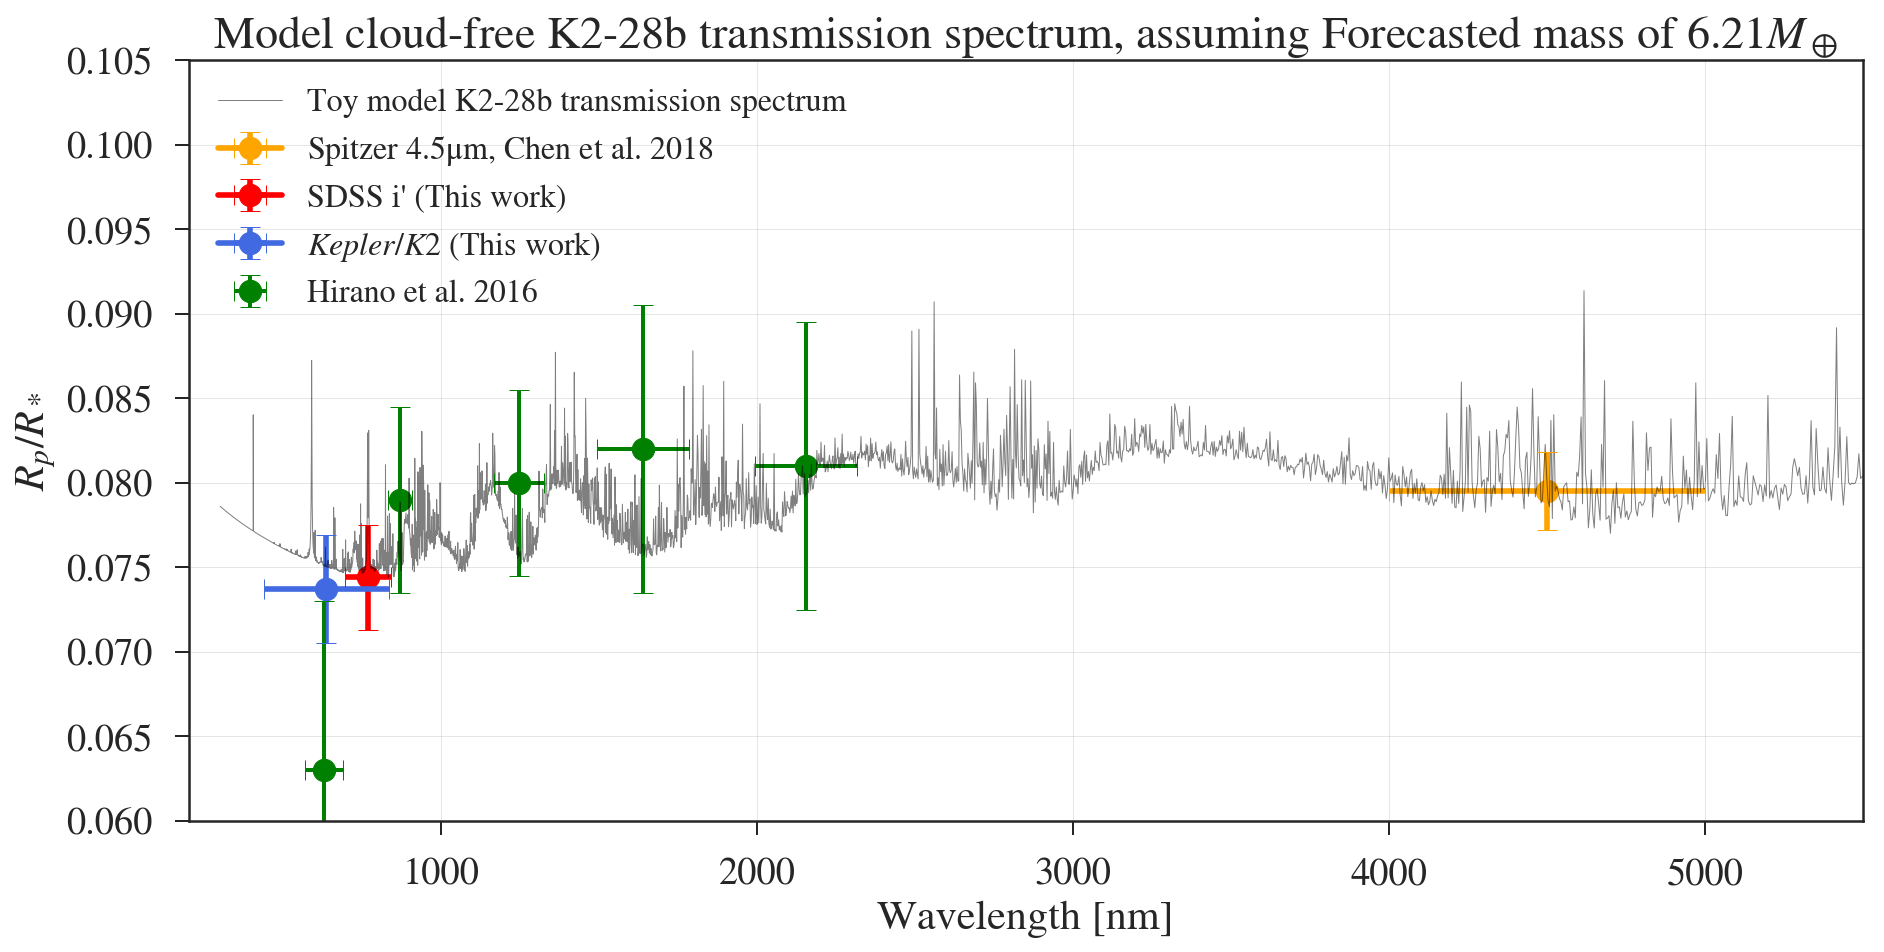

In [5]:
fig, ax = plt.subplots(figsize=(15,7))
# Transmission spectrum
ax.plot(df.Wavelength*1e9,np.sqrt(df["Transit Depth"].values/100.),lw=0.5,
        label="Toy model K2-28b transmission spectrum",alpha=0.5,color="k")
# Spitzer. Chen et al. 2018
ax.errorbar(4500.,0.0795,xerr=500.,yerr=0.0023,barsabove=True,marker="o",mew=0.5,
            label="Spitzer $\mathrm{4.5\mu m}$, Chen et al. 2018",capsize=5.,capthick=2.,color="orange")
# Diffuser assisted: this work
ax.errorbar(768.812,0.0744,xerr=(695.675-841.949)/2.,yerr=0.0031,barsabove=True,marker="o",
            mew=0.5,label="SDSS i' (This work)",capsize=5.,capthick=2.,color="red")
# Kepler/K2> this work
ax.errorbar((835.+437.)/2.,0.0737,xerr=(835.-437.)/2.,yerr=0.0032,barsabove=True,marker="o",
            mew=0.5,label=r"$\mathit{Kepler/K2}$ (This work)",capsize=5.,capthick=2.,color="RoyalBlue")
# Hirano et al. 2016
x_green=[628.780,869.057,1245.996,1638.277,2154.316]
y_green=[0.063,0.079,0.080,0.082,0.081]
xerr_green = [60.048,39.2555,79.6505,146.9865,160.8575]
yerr_green=[0.01,0.0055,0.0055,0.0085,0.0085]
ax.errorbar(x_green,y_green,yerr=yerr_green,xerr=xerr_green,barsabove=True,marker="o",
            mew=0.5,lw=0,elinewidth=2.,label="Hirano et al. 2016",capsize=5.,capthick=2.,color="green")

# Graphics
ax.legend(loc="upper left",fontsize=16)
ax.grid(lw=0.5,alpha=0.5)
ax.set_xlabel("Wavelength [nm]")
ax.set_ylabel(r"$R_p/R_*$")
ax.set_xlim(200.,5500.)
ax.set_ylim(0.06,0.105)
ax.set_title("Model cloud-free K2-28b transmission spectrum, assuming Forecasted mass of $6.21M_\oplus$")

fig.savefig("../figures/k2_28b_transmission.png",dpi=150)

In [9]:
p = np.polyfit([(835.+437.)/2.,768.812,4500.],[0.0737,0.0744,0.0795],1)

In [10]:
0.0737**2.

0.00543169

In [12]:
import astropy.constants as aconst
aconst.k_B

<<class 'astropy.constants.codata2014.CODATA2014'> name=u'Boltzmann constant' value=1.38064852e-23 uncertainty=7.9e-30 unit='J / K' reference=u'CODATA 2014'>

# Testing slope

In [35]:
radius_star = 0.288# Rsun
radius_star_error = 0.028

rprs = np.array([0.0737,0.0744,0.0795])
rp = rprs*radius_star*aconst.R_sun/aconst.R_earth # R_earth
w = np.array([(835.+437.)/2.,768.812,4500.]) #nm
lnw = np.log(w)

import astropylib.exoplanet_functions
teq = 425. #K

In [40]:
reload(astropylib.exoplanet_functions)
g = astropylib.exoplanet_functions.surface_gravity(6.81*aconst.M_earth,rp[0]*aconst.R_earth)
g

<Quantity 12.44861066 m / s2>

In [41]:
astropylib.exoplanet_functions.scale_height(teq,g)

<Quantity 122.5252404 J s2 / (K kg m)>

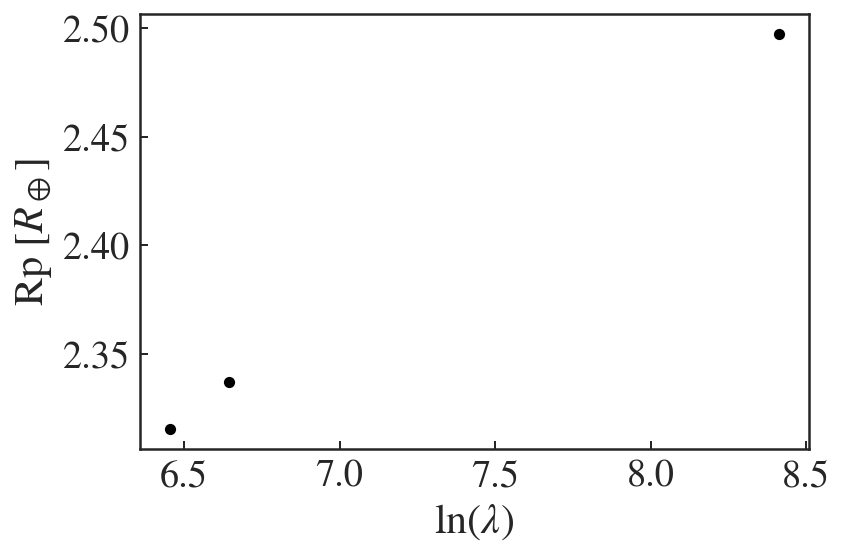

In [46]:
fig, ax = plt.subplots()
ax.plot(lnw,rp,'k.')
ax.set_xlabel('$\ln(\lambda)$')
ax.set_ylabel("Rp [$R_\oplus$]")

In [54]:
# Our ground:
0.0797**2.

0.006352089999999999

In [50]:
# Our K2


0.006037290000000001

In [51]:
0.0755**2.

0.00570025

In [53]:
# Spitzer from Chen
0.0795**2.

0.00632025

In [55]:
# Guo gets:
0.005774

0.005774

In [56]:
np.sqrt(0.006)

0.07745966692414834

In [57]:
0.0802**2.

0.006432039999999999